In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import cv2
import json
from sklearn.svm import SVC

In [12]:
file_name = "Dataset/right_data.csv"
vectors = np.zeros((423,81920))

In [13]:
r = open(file_name, mode='r')
lines = r.readlines()

In [33]:
for data in range(0, 423):
    numbers = lines[data].split(',')
    flir_vector = []
    for i in range(0,81920):
        flir_vector.append(float(numbers[i]))
    vectors[data, :] = np.transpose(flir_vector)

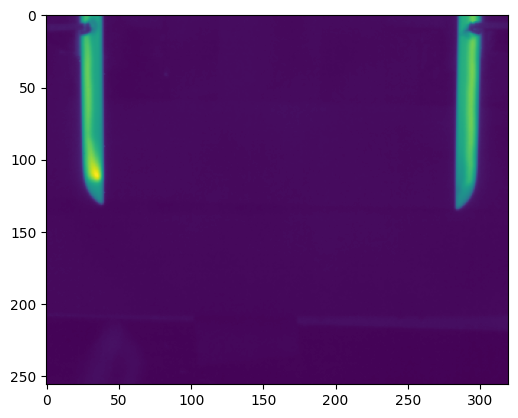

In [36]:
plt.figure(1)
plt.imshow(np.reshape(vectors[1,:],[256,320]))
plt.show()

In [37]:
processed_vectors = np.zeros((423,80))
for j in range(0, 423):
    flir_image = np.reshape(vectors[j,:],[256,320])

In [38]:
ret, mask = cv2.threshold(flir_image, 41, 255, cv2.THRESH_BINARY)
mask = mask / 255

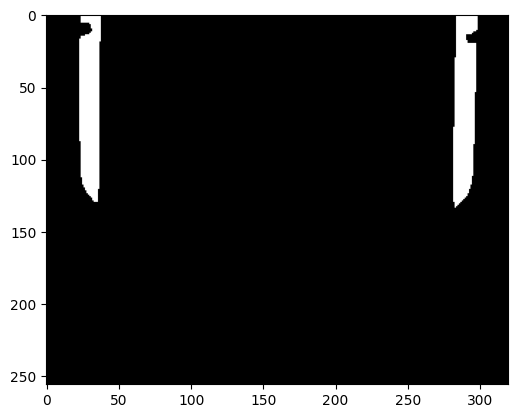

In [40]:
plt.imshow(mask, cmap=plt.cm.gray)
plt.show()

In [41]:
skeleton = skeletonize(mask)

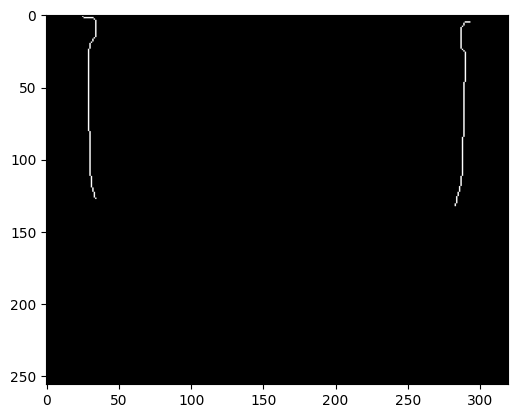

In [42]:
plt.imshow(skeleton, cmap=plt.cm.gray)
plt.show()

In [43]:
mixed = flir_image * skeleton
mixed_right = mixed[0:255, 160:319]

In [44]:
min_thresh = 0
res = np.where(mixed_right > min_thresh)[0]
maxn = np.max(res)
minn = np.max(res) - 80

In [52]:
num = 0
vector = np.zeros((80,1))
for i in range(minn, maxn):
    ii = i - (minn) + 1
    iii = maxn - ii
    index = np.where(mixed_right[iii, 0:319] > 0)[0]
    vector[num,0] = mixed_right[iii,index]
    num = num + 1
vector = np.transpose(vector)
processed_vectors[j,0:80] = vector

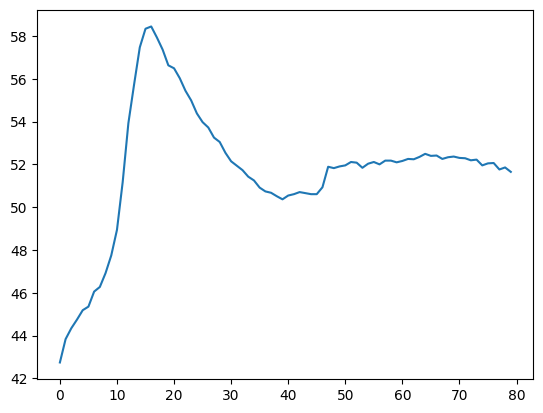

In [55]:
plt.figure(1)
plt.plot(np.arange(0,80), processed_vectors[422])
plt.show()

In [57]:
with open('Dataset/right_label.json', 'r') as infile:
    newlist = json.load(infile)

In [59]:
thres1 = 0.8
thres2 = 1.5
label = np.zeros((len(newlist), 1))
num = 0

for val in newlist:
    if val < thres1:
        label[num] = 0
    elif thres1<val<thres2:
        label[num] = 1
    elif val>thres2:
        label[num] = 0
    num = num + 1
label

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [65]:
import warnings
warnings.filterwarnings(action='ignore')

In [61]:
datas = np.hstack((processed_vectors, label))
wrong_guess_stack = 0

In [75]:
for i in range(0, 100):
    np.random.shuffle(datas)
    sX = datas[0:300, 0:80]
    sXt = datas[301:423, 0:80]
    sY = datas[0:300, 80:81]
    sYt = datas[301:423, 80:81]
    model = SVC(kernel='rbf')
    model.fit(sX, sY)
    s_result = model.predict(sXt)
    wrong_guess = np.sum(np.abs(s_result - np.transpose(sYt)))
    wrong_guess_stack = wrong_guess_stack + wrong_guess

In [76]:
(wrong_guess_stack/100/122) * 100

63.41803278688525